In [8]:
import pandas as pd

import pandas as pd

# Lendo o arquivo TXT como um CSV
df = pd.read_csv(r'C:\Users\Usuario\Documents\base de dados gelato mágico.txt', delimiter=',')  # Troque ',' pelo delimitador correto do seu arquivo
print(df)



           Data  Temperatura (°C)  Vendas (R$)  Quantidade Vendida
0    01/01/2025                30          500                 100
1    02/01/2025                28          480                  96
2    03/01/2025                29          490                  98
3    04/01/2025                31          510                 102
4    05/01/2025                33          530                 106
..          ...               ...          ...                 ...
96   07/04/2025                32          520                 104
97   08/04/2025                33          530                 106
98   09/04/2025                35          550                 110
99   10/04/2025                28          480                  96
100  11/04/2025                29          490                  98

[101 rows x 4 columns]


In [11]:
#import ml libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt



# separate features and create a binary target based on median sales
x = df[['Temperatura (°C)']].values
y = (df['Vendas (R$)'] > df['Vendas (R$)'].median()).astype(int)


# split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#set regularization hyperparameter
reg = 0.01

#train a logistic regression model
print('Training a logistic regression model with regularization parameter:', reg)
model = LogisticRegression(C=1/reg, solver="liblinear", multi_class="ovr").fit(x_train, y_train)

#calculate accuracy
y_hat = model.predict(x_test)
accuracy = np.average(y_hat == y_test)
print('Accuracy:', accuracy)

#calculate AUC
y_scores = model.predict_proba(x_test)[:,1]
auc = roc_auc_score(y_test, y_scores)
print('AUC:', str(auc)[:6])

Training a logistic regression model with regularization parameter: 0.01
Accuracy: 1.0
AUC: 1.0


C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


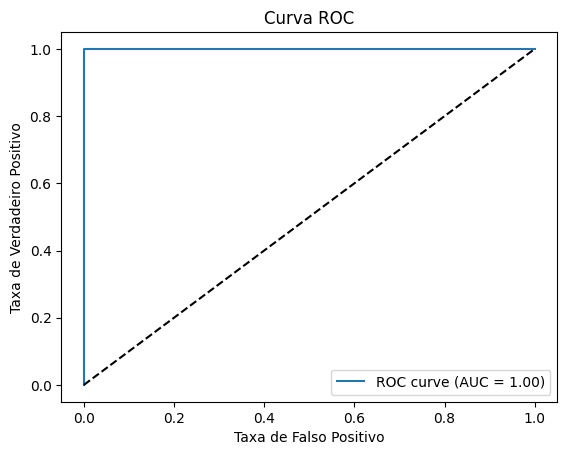

In [12]:
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


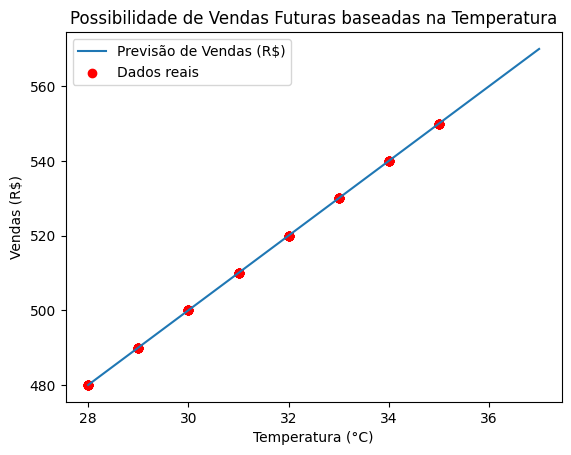

In [14]:
from sklearn.linear_model import LinearRegression
# Cria e ajusta um modelo de regressão linear para prever "Vendas (R$)" a partir da "Temperatura (°C)"
model_lr = LinearRegression()
x_temp = df[['Temperatura (°C)']]
y_sales = df['Vendas (R$)']
model_lr.fit(x_temp, y_sales)

# Gera uma faixa de temperaturas futuras, indo um pouco além do máximo atual
future_temps = np.linspace(df['Temperatura (°C)'].min(), df['Temperatura (°C)'].max() + 2, 100).reshape(-1, 1)
predicted_sales = model_lr.predict(future_temps)

# Plota a previsão de vendas futuras e os dados reais
plt.figure()
plt.plot(future_temps, predicted_sales, label='Previsão de Vendas (R$)')
plt.scatter(df['Temperatura (°C)'], df['Vendas (R$)'], color='red', label='Dados reais')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Vendas (R$)')
plt.title('Possibilidade de Vendas Futuras baseadas na Temperatura')
plt.legend()
plt.show()

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' 

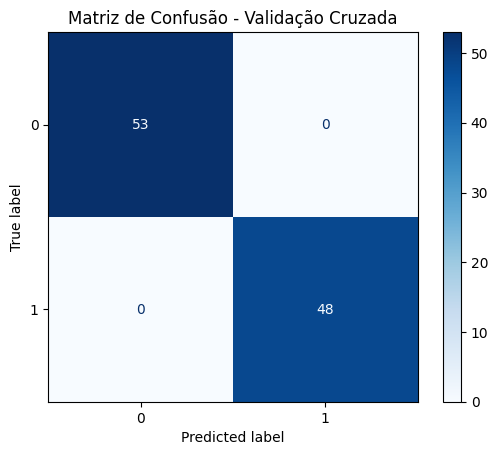

In [ ]:
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define o KFold para validação cruzada
kf = KFold(n_splits=5, random_state=42, shuffle=True)

# Realiza a validação cruzada e obtém as predições
y_pred_cv = cross_val_predict(model, x, y, cv=kf)

# Calcula a matriz de confusão
conf_matrix = confusion_matrix(y, y_pred_cv)

# Exibe a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão - Validação Cruzada")
plt.show()

In [16]:
for row in conf_matrix:
    print(row)

[53  0]
[ 0 48]
